In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("/Users/vj/Documents/ALY6040-DataMining")



In [16]:
import pandas as pd
import os

# The directory where the CSV files are stored
csv_dir = '/Users/vj/Documents/ALY6040-DataMining'

# List all files in the directory
files = os.listdir(csv_dir)

# Filter the list down to only .csv files
csv_files = [file for file in files if file.endswith('.csv')]

# Initialize an empty list to store the data frames
dfs = []

# Loop over the list of csv files
for csv_file in csv_files:
    # Read each csv file into a data frame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))
    
    # Append the data frame to the list
    dfs.append(df)

# Concatenate all data frames
df = pd.concat(dfs, ignore_index=True)

# Write the output to a new CSV file
df.to_csv('/Users/vj/Documents/ALY6040-DataMining/new.csv', index=False)

df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,803,2022-11-01 00:00:04.9940,2022-11-01 00:13:28.6550,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,472,MIT Hayward St at Amherst St,42.360859,-71.085519,2088,Subscriber,02142
1,759,2022-11-01 00:00:23.0540,2022-11-01 00:13:02.3880,19,Park Dr at Buswell St,42.347241,-71.105301,52,Newbury St at Hereford St,42.348717,-71.085954,6889,Customer,NaN
2,1314,2022-11-01 00:00:55.8440,2022-11-01 00:22:50.6750,459,Canal St at Causeway St,42.365301,-71.060922,404,Mass Ave T Station,42.341356,-71.083370,3099,Customer,19454
3,541,2022-11-01 00:01:09.7570,2022-11-01 00:10:11.6560,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,5,Northeastern University - North Parking Lot,42.341814,-71.090179,7374,Subscriber,08802
4,478,2022-11-01 00:01:29.2300,2022-11-01 00:09:27.6360,554,Forsyth St at Huntington Ave,42.339202,-71.090511,360,Bartlett St at John Elliot Sq,42.329463,-71.090158,5108,Subscriber,02115


In [19]:
# Assuming your DataFrame is named 'df'
# Splitting the day and time from 'starttime' column
df['start_day'] = pd.to_datetime(df['starttime']).dt.date
df['start_time'] = pd.to_datetime(df['starttime']).dt.time

# Splitting the day and time from 'stoptime' column
df['stop_day'] = pd.to_datetime(df['stoptime']).dt.date
df['stop_time'] = pd.to_datetime(df['stoptime']).dt.time

df = df.drop(['starttime', 'stoptime'], axis=1)


In [8]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,start_day,start_time,stop_day,stop_time
0,803,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,472,MIT Hayward St at Amherst St,42.360859,-71.085519,2088,Subscriber,02142,2022-11-01,00:00:04.994000,2022-11-01,00:13:28.655000
1,759,19,Park Dr at Buswell St,42.347241,-71.105301,52,Newbury St at Hereford St,42.348717,-71.085954,6889,Customer,NaN,2022-11-01,00:00:23.054000,2022-11-01,00:13:02.388000
2,1314,459,Canal St at Causeway St,42.365301,-71.060922,404,Mass Ave T Station,42.341356,-71.083370,3099,Customer,19454,2022-11-01,00:00:55.844000,2022-11-01,00:22:50.675000
3,541,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,5,Northeastern University - North Parking Lot,42.341814,-71.090179,7374,Subscriber,08802,2022-11-01,00:01:09.757000,2022-11-01,00:10:11.656000
4,478,554,Forsyth St at Huntington Ave,42.339202,-71.090511,360,Bartlett St at John Elliot Sq,42.329463,-71.090158,5108,Subscriber,02115,2022-11-01,00:01:29.230000,2022-11-01,00:09:27.636000


Text(0, 0.5, 'Start Station Name')

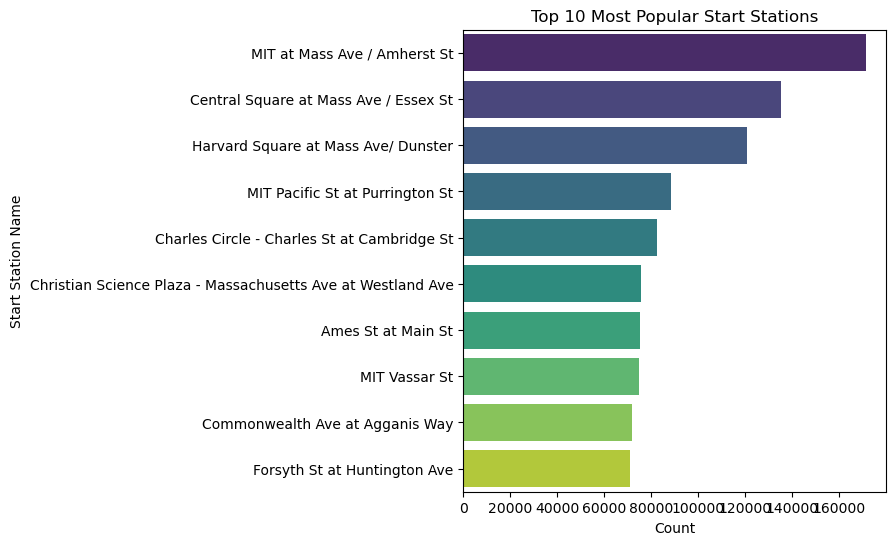

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Getting the counts of the start and end stations
start_station_counts = df['start station name'].value_counts()
end_station_counts = df['end station name'].value_counts()

# Getting the top 10 most popular start stations and end stations
top_start_stations = start_station_counts.head(10)
top_end_stations = end_station_counts.head(10)

plt.figure(figsize=(12, 6))

# Plotting the most popular start stations
plt.subplot(1, 2, 1)
sns.barplot(y=top_start_stations.index, x=top_start_stations.values, orient='h', palette='viridis')
plt.title('Top 10 Most Popular Start Stations')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

# Plotting the most popular end stations
plt.subplot(1, 2, 2)
sns.barplot(y=top_end_stations.index, x=top_end_stations.values, orient='h', palette='viridis')
plt.title('Top 10 Most Popular End Stations')
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.show()




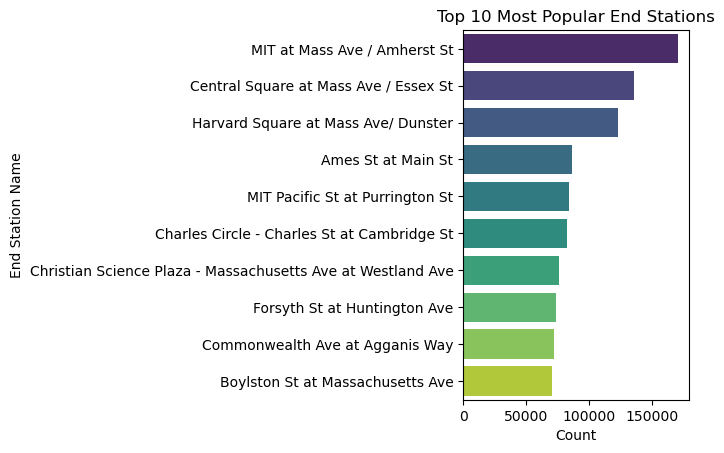

In [6]:
# Plot the most popular end stations
plt.subplot(1, 2, 2)
sns.barplot(y=top_end_stations.index, x=top_end_stations.values, orient='h', palette='viridis')
plt.title('Top 10 Most Popular End Stations')
plt.xlabel('Count')
plt.ylabel('End Station Name')


plt.show()


In [17]:
# Assuming 'start_time' column is in format '2022-11-01 00:00:04.994000'
# Extract just the time part and convert to datetime
df['start_time'] = pd.to_datetime(df['start_time'].str.split(' ').str[1])

# Extract the hour from 'start_time'
df['start_hour'] = df['start_time'].dt.hour

# Count the number of rides per hour
hourly_rides = df['start_hour'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_rides.index, y=hourly_rides.values, color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Hour of the Day')
plt.show()


KeyError: 'start_time'

In [14]:
print(df.columns)

Index(['tripduration', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'postal code', 'start_day', 'start_time',
       'stop_day', 'stop_time'],
      dtype='object')


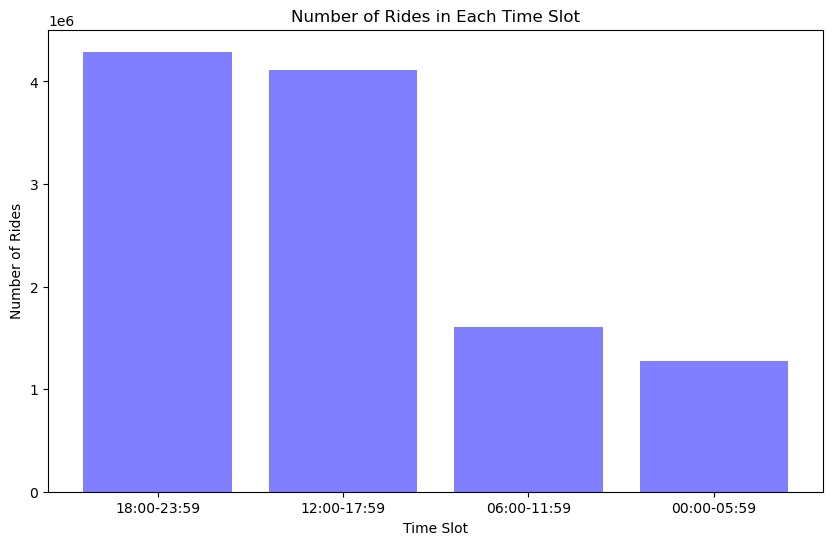

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to map each hour of the day to a 6-hour time slot
def get_time_slot(hour):
    if 0 <= hour < 6:
        return '00:00-05:59'
    elif 6 <= hour < 12:
        return '06:00-11:59'
    elif 12 <= hour < 18:
        return '12:00-17:59'
    else:
        return '18:00-23:59'

# Apply this function to the start_time column to create the time_slot column
df['time_slot'] = df['start_time'].apply(lambda x: get_time_slot(x.hour))

# Count the number of rides in each time slot
time_slot_counts = df['time_slot'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(time_slot_counts.index, time_slot_counts.values, color='b', alpha=0.5)
plt.xlabel('Time Slot')
plt.ylabel('Number of Rides')
plt.title('Number of Rides in Each Time Slot')
plt.show()


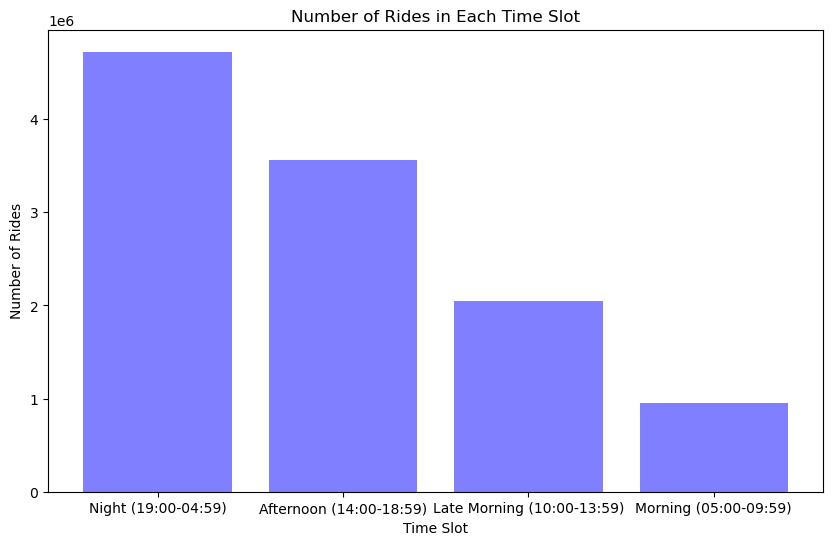

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining a function to map each hour of the day to your defined time slot
def get_time_slot(hour):
    if 5 <= hour < 10:
        return 'Morning (05:00-09:59)'
    elif 10 <= hour < 14:
        return 'Late Morning (10:00-13:59)'
    elif 14 <= hour < 19:
        return 'Afternoon (14:00-18:59)'
    else:
        return 'Night (19:00-04:59)'

# Applying this function to the start_time column to create the time_slot column
df['time_slot'] = df['start_time'].apply(lambda x: get_time_slot(x.hour))

# Counting the number of rides in each time slot
time_slot_counts = df['time_slot'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(time_slot_counts.index, tie_slot_counts.values, color='b', alpha=0.5)
plt.xlabel('Time Slot')
plt.ylabel('Number of Rides')
plt.title('Number of Rides in Each Time Slot')
plt.show()


In [23]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,start_day,start_time,stop_day,stop_time,time_slot
0,803,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,472,MIT Hayward St at Amherst St,42.360859,-71.085519,2088,Subscriber,02142,2022-11-01,00:00:04.994000,2022-11-01,00:13:28.655000,Night (19:00-04:59)
1,759,19,Park Dr at Buswell St,42.347241,-71.105301,52,Newbury St at Hereford St,42.348717,-71.085954,6889,Customer,NaN,2022-11-01,00:00:23.054000,2022-11-01,00:13:02.388000,Night (19:00-04:59)
2,1314,459,Canal St at Causeway St,42.365301,-71.060922,404,Mass Ave T Station,42.341356,-71.083370,3099,Customer,19454,2022-11-01,00:00:55.844000,2022-11-01,00:22:50.675000,Night (19:00-04:59)
3,541,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,5,Northeastern University - North Parking Lot,42.341814,-71.090179,7374,Subscriber,08802,2022-11-01,00:01:09.757000,2022-11-01,00:10:11.656000,Night (19:00-04:59)
4,478,554,Forsyth St at Huntington Ave,42.339202,-71.090511,360,Bartlett St at John Elliot Sq,42.329463,-71.090158,5108,Subscriber,02115,2022-11-01,00:01:29.230000,2022-11-01,00:09:27.636000,Night (19:00-04:59)


In [26]:
df.drop_duplicates()


,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,start_day,start_time,stop_day,stop_time,time_slot
0,803,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,472,MIT Hayward St at Amherst St,42.360859,-71.085519,2088,Subscriber,02142,2022-11-01,00:00:04.994000,2022-11-01,00:13:28.655000,Night (19:00-04:59)
1,759,19,Park Dr at Buswell St,42.347241,-71.105301,52,Newbury St at Hereford St,42.348717,-71.085954,6889,Customer,NaN,2022-11-01,00:00:23.054000,2022-11-01,00:13:02.388000,Night (19:00-04:59)
2,1314,459,Canal St at Causeway St,42.365301,-71.060922,404,Mass Ave T Station,42.341356,-71.083370,3099,Customer,19454,2022-11-01,00:00:55.844000,2022-11-01,00:22:50.675000,Night (19:00-04:59)
3,541,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,5,Northeastern University - North Parking Lot,42.341814,-71.090179,7374,Subscriber,08802,2022-11-01,00:01:09.757000,2022-11-01,00:10:11.656000,Night (19:00-04:59)
4,478,554,Forsyth St at Huntington Ave,42.339202,-71.090511,360,Bartlett St at John Elliot Sq,42.329463,-71.090158,5108,Subscriber,02115,2022-11-01,00:01:29.230000,2022-11-01,00:09:27.636000,Night (19:00-04:59)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624342,331,558,St. Alphonsus St at Tremont St,42.333293,-71.101246,5,Northeastern University - North Parking Lot,42.341814,-71.090179,8407,Customer,19460,2022-09-30,23:58:32.641000,2022-10-01,00:04:03.889000,Night (19:00-04:59)
4624343,763,23,Boston City Hall - 28 State St,42.358920,-71.057629,31,Seaport Hotel - Congress St at Seaport Ln,42.348810,-71.041677,8248,Subscriber,02205,2022-09-30,23:58:49.085000,2022-10-01,00:11:33.083000,Night (19:00-04:59)
4624344,1706,115,Porter Square Station,42.387995,-71.119084,437,Berkshire Street at Cambridge Street,42.372077,-71.089954,3990,Subscriber,02124,2022-09-30,23:58:55.716000,2022-10-01,00:27:21.867000,Night (19:00-04:59)
4624345,427,26,Washington St at Waltham St,42.341575,-71.068904,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,3376,Subscriber,02116,2022-09-30,23:59:04.295000,2022-10-01,00:06:11.802000,Night (19:00-04:59)


In [ ]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
from math import radians, sin, cos, sqrt, atan2



blue_bikes = df

# shape of the dataset
blue_bikes.head()



user_type_counts = blue_bikes['usertype'].value_counts()


# Plot user types
plt.figure(figsize=(8, 6))
sns.barplot(x=user_type_counts.index, y=user_type_counts.values)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Types')
plt.show()



# Convert start time to datetime format
blue_bikes['starttime'] = pd.to_datetime(blue_bikes['starttime'])

# Analyze ride frequencies by hour of the day
blue_bikes['hour'] = blue_bikes['starttime'].dt.hour
ride_freq_hour = blue_bikes['hour'].value_counts().sort_index()

# Plot ride frequencies by hour of the day (Line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(x=ride_freq_hour.index, y=ride_freq_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Frequency')
plt.title('Ride Frequencies by Hour of the Day')
plt.show()

# Identify peak hours, weekdays, or months with high or low ride frequencies
peak_hours = ride_freq_hour.idxmax()

print("Peak Hour:", peak_hours)



def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Radius of the Earth in kilometers
    radius = 6371

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c

    return distance

# Calculate distance between two points
blue_bikes['distance'] = blue_bikes.apply(lambda row: calculate_distance(row['start station latitude'], row['start station longitude'], row['end station latitude'], row['end station longitude']), axis=1)






In [ ]:




# Calculate average trip duration for subscribers and customers
avg_duration_by_user_type = df.groupby('usertype')['tripduration'].mean()


sns.barplot(x=avg_duration_by_user_type.index, y=avg_duration_by_user_type.values)
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (seconds)')
plt.title('Average Trip Duration by User Type')
plt.show()

In [ ]:
# Extract the day of the week from the start_day column
df['start_day'] = pd.to_datetime(df['start_day'])
df['day_of_week'] = df['start_day'].dt.day_name()

# Count the number of trips on weekdays and weekends
trips_by_day = df['day_of_week'].value_counts()

# Plot the number of trips on weekdays versus weekends
plt.figure(figsize=(10, 6))
plt.bar(trips_by_day.index, trips_by_day.values, width=0.6)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips on Weekdays versus Weekends')
plt.figure(figsize=(50,5))
plt.show()

In [ ]:

# Calculate correlation matrix
correlation_matrix = blue_bikes[['tripduration', 'distance']].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analyze specific correlations
trip_duration_corr = correlation_matrix.loc['tripduration', 'distance']
distance_corr = correlation_matrix.loc['distance', 'tripduration']

# Assess the strength and direction of correlations
if abs(trip_duration_corr) > 0.5:
    strength = "strong"
elif abs(trip_duration_corr) > 0.3:
    strength = "moderate"
else:
    strength = "weak"

if trip_duration_corr > 0:
    direction = "positive"
else:
    direction = "negative"

print("Correlation between trip duration and distance traveled:")
print("Strength:", strength)
print("Direction:", direction)
print("Correlation coefficient:", trip_duration_corr)


Number of rows: 11271843
Number of columns: 17
Number of duplicate rows: 7514562
Top 5 most frequently used stations:
MIT at Mass Ave / Amherst St                   256914
Central Square at Mass Ave / Essex St          202602
Harvard Square at Mass Ave/ Dunster            181062
MIT Pacific St at Purrington St                132726
Charles Circle - Charles St at Cambridge St    123738
Name: start station name, dtype: int64


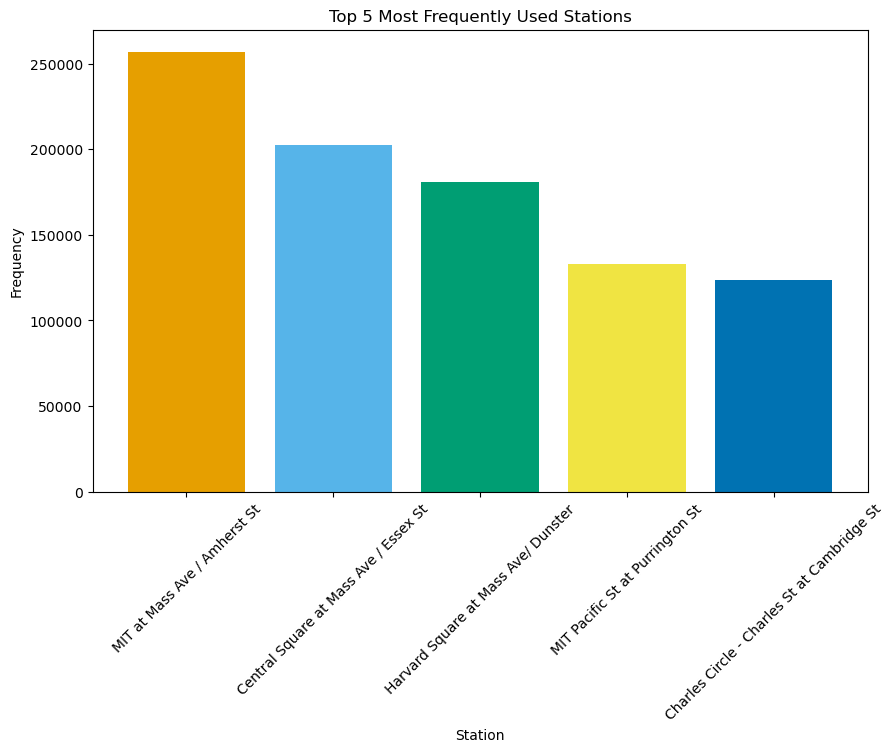

Number of trips by user type:
Subscriber    8517954
Customer      2753889
Name: usertype, dtype: int64


In [32]:

#Data set enteries
df_1= df

num_rows = df_1.shape[0]

num_columns = df_1.shape[1]

print("Number of rows:", num_rows)

print("Number of columns:", num_columns)

#Missing data
df_1.isnull().sum()


duplicates = df_1.duplicated()

num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)



top_stations = df_1['start station name'].value_counts().head(5)

print("Top 5 most frequently used stations:")

print(top_stations)



#Top 5 Most Frequently Used Stations

import matplotlib.pyplot as plt

 

top_stations = df_1['start station name'].value_counts().head(5)

 

# Define a color palette

colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

 

plt.figure(figsize=(10, 6))

plt.bar(top_stations.index, top_stations.values, color=colors)

plt.xlabel('Station')

plt.ylabel('Frequency')

plt.title('Top 5 Most Frequently Used Stations')

plt.xticks(rotation=45)

plt.show()



#Number of trips by user type:

user_type_counts = df_1['usertype'].value_counts()

print("Number of trips by user type:")

print(user_type_counts)